In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import utils

In [2]:
prefixes = [
    '../retrieval_outputs/no_bands_K_A_ret_2/test_', 
    '../retrieval_outputs/eq_band_K_A_ret_3/test_', 
    '../retrieval_outputs/spot_K_A_ret_3/test_', 
    ]

CCF_species = {
    'complete': [None]*len(prefixes), 
    'H2O':      ['H2O_pokazatel_main_iso']*len(prefixes), 
    'CO':       ['CO_main_iso']*len(prefixes), 
    'CH4':      ['CH4_hargreaves_main_iso']*len(prefixes), 
    }

vsini = []; vtell = []; Rot = []

for i, prefix_i in enumerate(prefixes):

    Res_i = utils.RetrievalResults(prefix=prefix_i)

    for key_j, line_species_j in CCF_species.items():

        print(f'{key_j}')
        
        flux_global = None; subtract_global = False
        if line_species_j[i] is None:
            # Get the global model spectrum
            _, flux_global, Rot_i = Res_i.get_model_spec(is_local=False)
            subtract_global = True
        
        # Template spectrum of one species
        wave_local, flux_local, _ = Res_i.get_model_spec(
            is_local=True, line_species=line_species_j[i]
            )
        
        
        #orders_to_include = [0]
        orders_to_include = None
        #if key_j == 'CO':
        #    orders_to_include = [3,4] # Doesn't matter

        # Compute cross-correlation
        rv, _, CCF_SNR = Res_i.get_CCF(
            wave_local, flux_local, flux_global, 
            subtract_global=subtract_global, 
            orders_to_include=orders_to_include
            #high_pass={
            #    'm_res': utils.high_pass_filter(window_length=51), 
            #    #'d_res': utils.high_pass_filter(window_length=101), 
            #    }, 
            )
        CCF_species[key_j][i] = CCF_SNR

        del wave_local, flux_local, flux_global
    
    
    vsini.append(Res_i.bestfit_params['K2166_cloudy']['vsini'])
    vtell.append(Res_i.vtell)
    Rot.append(Rot_i)
    del Res_i
    
    print()

  analysing data from ../retrieval_outputs/no_bands_K_A_ret_2/test_.txt
complete


100%|██████████| 1201/1201 [00:07<00:00, 161.30it/s]


H2O


100%|██████████| 1201/1201 [00:06<00:00, 196.76it/s]


CO


100%|██████████| 1201/1201 [00:06<00:00, 191.11it/s]


CH4


100%|██████████| 1201/1201 [00:06<00:00, 193.11it/s]



  analysing data from ../retrieval_outputs/eq_band_K_A_ret_3/test_.txt
complete


100%|██████████| 1201/1201 [00:06<00:00, 181.50it/s]


H2O


100%|██████████| 1201/1201 [00:07<00:00, 166.76it/s]


CO


100%|██████████| 1201/1201 [00:07<00:00, 151.28it/s]


CH4


100%|██████████| 1201/1201 [00:06<00:00, 191.29it/s]



  analysing data from ../retrieval_outputs/spot_K_A_ret_3/test_.txt
complete


100%|██████████| 1201/1201 [00:06<00:00, 192.94it/s]


H2O


100%|██████████| 1201/1201 [00:06<00:00, 195.71it/s]


CO


100%|██████████| 1201/1201 [00:06<00:00, 196.51it/s]


CH4


100%|██████████| 1201/1201 [00:06<00:00, 195.16it/s]

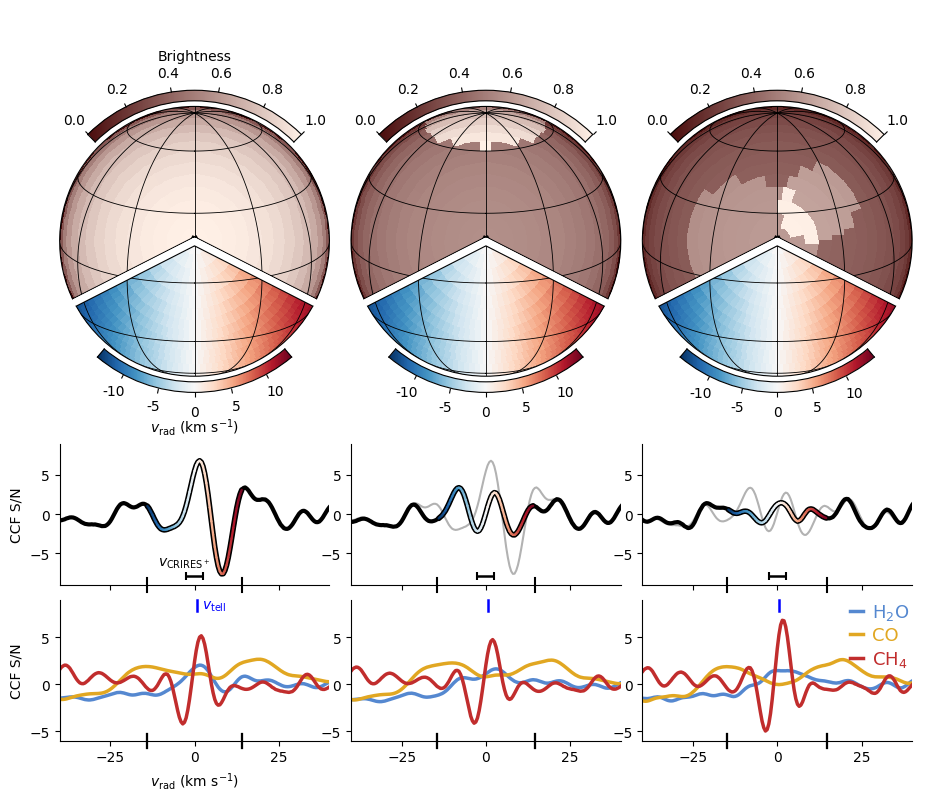

In [19]:
ylims = [(-9,9), (-6,9)]; xlims = [(-40,40), (-40,40)]
colors = {'H2O': utils.get_color(3), 'CO': utils.get_color(4), 'CH4': utils.get_color(2)}
labels_species = {'H2O': r'H$_2$O', 'CO': r'CO', 'CH4': r'CH$_4$'}

shrink = 0.9
cmap = utils.get_cmap()

old_CCF_i = None

ax_thetalim  = [
    np.pi/2 + 1/2*1.3*np.pi*np.array([-1,1]), 
    -np.pi/2 + 1/2*(2-1.3)*np.pi*np.array([-1,1])
    #-np.pi/2 + 1*np.pi*np.array([-1,1]), 
    #np.pi/2*np.array([1,1])
    ]
cax_thetalim = [
    (np.pi/2-np.pi/4,np.pi/2+np.pi/4), 
    #(-np.pi+1/4*np.pi,-np.pi+3/4*np.pi), 
    (-np.pi/2-np.pi/4.5,-np.pi/2+np.pi/4.5), 
    ]

fig = plt.figure(figsize=(11,1.9*6.5/1.45))
gs = fig.add_gridspec(nrows=4, ncols=3, hspace=0.1, wspace=0.08, height_ratios=[1,0.05,0.45,0.45])

ax = []; cax = []; ax_CCF = []

for i, (Rot_i, vsini_i, vtell_i) in enumerate(zip(Rot, vsini, vtell)):

    # --- Brightness map --------------------------------
    ax_i  = fig.add_subplot(gs[0,i], projection='polar')
    cax_i = fig.add_subplot(gs[0,i], projection='polar')

    labels = ['Brightness', r'$v_\mathrm{rad}\ (\mathrm{km\ s^{-1}})$']
    if i != 0:
        labels = [None, None]

    sphere = utils.SpherePlot(Rot_i, fig, ax_i, cax_i)
    sphere.plot_map(
        attr='int_flux', cmap=cmap, edgecolors='face', lw=1e-6, 
        )
    sphere.configure_ax(
        xlim=ax_thetalim[0], sep_spine_lw=5, grid_lw=0.6, #grid_color='none'
        )
    sphere.configure_cax(
        label=labels[0], xlim=cax_thetalim[0], cb_width=0.07, scale=1.12, flip_cb=False, 
        xticks=[0.0,0.2,0.4,0.6,0.8,1.0], vmin=1., vmax=0., cmap=cmap
        #xticks=[1.0,0.8,0.6,0.4,0.2,0.0], vmin=0., vmax=1., cmap=cmap
        )
    ax.append(ax_i); cax.append(cax_i)

    # --- Velocity map ----------------------------------
    ax_i  = fig.add_subplot(gs[0,i], projection='polar')
    cax_i = fig.add_subplot(gs[0,i], projection='polar')
    sphere = utils.SpherePlot(Rot_i, fig, ax_i, cax_i)
    sphere.plot_map(
        attr='v_grid', cmap='RdBu_r', edgecolors='face', lw=1e-6, 
        )
    sphere.configure_ax(
        xlim=ax_thetalim[1], sep_spine_lw=5, grid_lw=0.6
        )
    sphere.configure_cax(
        label=labels[1], 
        xlim=cax_thetalim[1], cb_width=0.07, scale=1.12, 
        xticks=np.arange(-25,25+1,5), vmin=-vsini_i, vmax=vsini_i, cmap='RdBu_r'
        )
    ax.append(ax_i); cax.append(cax_i)

    # --- Cross-correlation -----------------------------

    for j, (key_j, CCF_j) in enumerate(CCF_species.items()):

        if j > 1:
            ax_j = ax_CCF[-1]
            ylim_j = ylims[1]
        else:
            ax_j = fig.add_subplot(gs[j+2,i])
            ylim_j = ylims[j]
            xlim_j = xlims[j]
            

            # Set x-axis to y=0
            #ax_j.spines[['bottom']].set_position('zero')
            ax_j.spines[['bottom']].set_zorder(3)
            ax_j.set(xticks=np.arange(-100,101,25), )#xticklabels=[])

        if j == 0:
            # Add velocity resolution element
            R = 60000; v_res = 3e5/R
            #ax_j.errorbar(
            #    0, 0.06, xerr=v_res/2, transform=ax_j.get_xaxis_transform(), c='k', 
            #    clip_on=False, capsize=3., capthick=1.5, elinewidth=1.8
            #)
            ax_j.errorbar(
                -60, 0.9, xerr=v_res/2, transform=ax_j.get_xaxis_transform(), c='k', 
                clip_on=False, capsize=3., capthick=1.5, elinewidth=1.8
            )
            ax_j.plot(
                [vtell_i]*2, [-0.15+0.04,-0.15-0.04], transform=ax_j.get_xaxis_transform(), 
                c='k', clip_on=False, lw=1.8
            )

        # Plot the cross-correlation functions
        CC = utils.CrossCorrPlot(fig, ax_j, vsini=vsini_i, vtell=vtell_i)
        if j == 0:
            CC.plot(rv, CCF_j[i], CCF_other=old_CCF_i, lw=3, c='k', plot_colorbar=False)
            ax_j.set(xticklabels=[])

            old_CCF_i = CCF_j[i]
        else:
            CC.plot(
                rv, CCF_j[i], lw=2.5, c=colors[key_j], label=labels_species[key_j], 
                plot_multicolor=False, zorder=-1
                )

        CC.configure_ax(ylabel=None, ylim=ylim_j, xlabel=None, xlim=xlim_j, plot_axvline=False)
        CC.add_xtick_at_vsini(length=0.1, c='k')

        ax_CCF.append(ax_j)

if xlims[0] != xlims[1]:
    x0 = ax_CCF[1].get_xlim()[0]
    y0 = ax_CCF[0].get_ylim()[0]
    width  = np.abs(ax_CCF[1].get_xlim()[1] - x0)
    bounds = (x0, y0, width, 0)

    _, con_patch = ax_CCF[0].indicate_inset(
        bounds=bounds, inset_ax=ax_CCF[1], edgecolor='k', alpha=0.2, 
        #transform=ax_CCF[1].get_xaxis_transform(), 
        )

# Annotate the resolution element + telluric velocity
#ax_CCF[0].annotate(
#    r'$v_\mathrm{CRIRES^+}$', xy=(-v_res/2+7,0.06+0.09), 
#    xycoords=ax_CCF[0].get_xaxis_transform(), annotation_clip=False, c='k', 
#    ha='right', va='center', 
#)
ax_CCF[0].annotate(
    r'$v_\mathrm{CRIRES^+}$', xy=(-40-v_res/2+7,0.9), 
    xycoords=ax_CCF[0].get_xaxis_transform(), annotation_clip=False, c='k', 
    ha='left', va='center', 
)
ax_CCF[0].annotate(
    r'$v_\mathrm{tell}$', xy=(vtell_i+1.6,-0.15), 
    xycoords=ax_CCF[0].get_xaxis_transform(), annotation_clip=False, c='k', 
    ha='left', va='center', 
)

ax_CCF[-1].legend(
    loc='upper right', bbox_to_anchor=(1.05,1.1), #markerfirst=False, 
    labelcolor=list(colors.values()), fontsize=13, frameon=False, 
    handlelength=0.7, labelspacing=0.25, handletextpad=0.5, 
)

ax_CCF[0].set(ylabel='CCF S/N')
ax_CCF[1].set(
    xlabel=r'$v_\mathrm{rad}\ (\mathrm{km\ s^{-1}})$', 
    ylabel='CCF S/N'
    )

# Create a tighter bounding box to save the figure
l, b, *_ = ax_CCF[1].get_position().bounds
r = ax_CCF[-1].get_position().bounds[0] + ax_CCF[-1].get_position().bounds[2]
t = cax[0].get_position().bounds[1] + cax[0].get_position().bounds[3]

#l, r, b, t = np.array([l, r, b, t]) + np.array([-0.055,0.02,-0.07,-0.05])
l, r, b, t = np.array([l, r, b, t]) + np.array([-0.06,0.02,-0.065,-0.035])

l, r = np.array([l, r]) * fig.get_size_inches()[0]
b, t = np.array([b, t]) * fig.get_size_inches()[1]
bbox = mpl.transforms.Bbox([[l,b],[r,t]])

plt.savefig('./plots/surface_comparison_A.pdf', bbox_inches=bbox)
plt.show()